# HW 4
***
Вариант 2

Анастасия Добрынина, БКЛ-211

In [1]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt 
import json
import pandas as pd
from sklearn import manifold
from sklearn.metrics import euclidean_distances

**Шаг 1 (max 1 балл).**

Возьмите свой датасет из дз 1 (тот набор узлов и ребёр, из которых состоял ваш первый граф) и превратите его в «типологическую» матрицу, в строках которой будут синсеты, в столбцах - слова, а на их пересечении - 0, если слово не относится к данному синсету, и 1, если относится.

In [2]:
# подгружаем старые данные в виде словаря {лемма: [синсеты]}
with open('data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [3]:
data['sleep_together']

['sleep_together.v.01', 'sleep_together.v.01']

In [4]:
synsets = set()
for lemma_list in data.values():
    for lemma in lemma_list:
        synsets.add(lemma)

In [5]:
matrix = pd.DataFrame([], list(synsets))

In [6]:
# создаем матрицу с нужными строками и столбцами, заполненную NaN-ами
for lemma in data.keys():
    matrix = pd.concat([matrix, pd.DataFrame(columns=[lemma])], axis=1)

In [7]:
# ставим единицы на пересечении
for lemma, synset_list in data.items():
    for synset in synset_list:
        matrix[lemma][synset] = 1

In [8]:
matrix.fillna(0, inplace=True)

In [9]:
matrix.head()

,sleep_together,roll_in_the_hay,love,make_out,make_love,sleep_with,get_laid,have_sex,know,do_it,...,ค้นคว้า,นึกภาพ,เห็นภาพ,ทำให้เป็นจริง,ทำให้เป็นรูปธรรม,วางขาย,นอนลง,เอนตัว,เอนหลัง,มีอะไร
know.v.03,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
know.v.04,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
know.v.01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
visualize.v.01,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
know.v.09,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Шаг 2 (max 1 балл).**

Сократите размерность этой матрицы до 2 методом MDS, визуализируйте результат.

In [10]:
similarities = euclidean_distances(matrix.values)
mds = manifold.MDS(n_components=2, random_state = 42)
print(mds.fit(similarities).stress_) # функция потерь: показывает, насколько сильно расстояния в новом пространстве отличаются от расстояний в исходном пространстве  

14791.04875098151


C:\Users\79998\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\79998\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [11]:
array_mds = mds.fit_transform(matrix.values)

C:\Users\79998\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [12]:
x = []
y = []
for pair in array_mds:
    x.append(pair[0])
    y.append(pair[1])

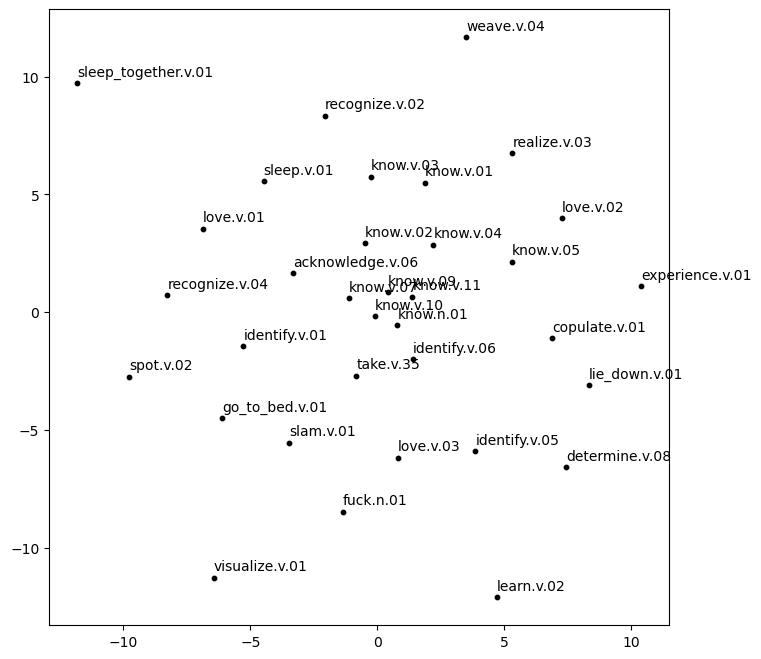

In [13]:
plt.figure(figsize = [8, 8])
phrases = matrix.index
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = 'black', s=10)
    plt.annotate(phrases[i], (x[i], y[i]+0.3))
plt.show()

In [14]:
mds3d = manifold.MDS(n_components=3, random_state = 42)
print(mds3d.fit(similarities).stress_) # функция потерь: показывает, насколько сильно расстояния в новом пространстве отличаются от расстояний в исходном пространстве  

C:\Users\79998\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\79998\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


7891.034931734202


При трех измерениях функция потерь почти в два раза меньше, поэтому стоит посмотреть и на трехмерную репрезентацию

In [15]:
array_mds3d = mds3d.fit_transform(matrix.values)

C:\Users\79998\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [16]:
x = []
y = []
z = []
for triple in array_mds3d:
    x.append(triple[0])
    y.append(triple[1])
    z.append(triple[2])

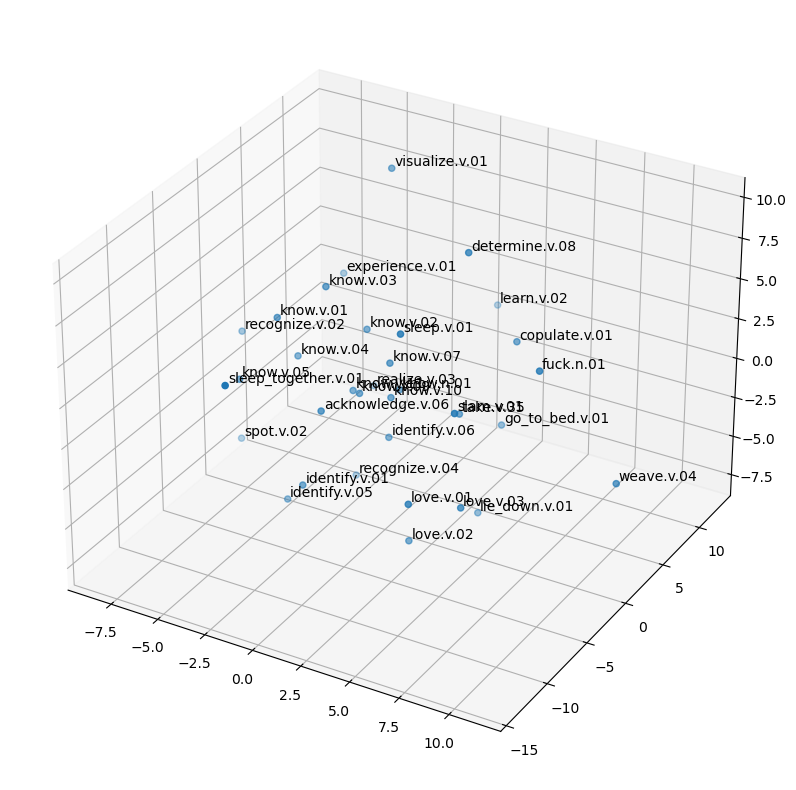

In [17]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
phrases = matrix.index
for i in range(len(x)):
    ax.text(x[i], y[i]+0.3, z[i], phrases[i])
ax.scatter(x, y, z)
plt.show()

**Шаг 3 (max 2 балла).**

Проанализируйте то, что у вас получилось. Видны ли какие-то закономерности? Стали ли заметны какие-то новые закономерности, которые не были видны раньше, когда вы строили граф? Какие синсеты оказались ближе друг к другу, а какие дальше друг от друга? Кажется ли вам этот результат осмысленным?
***

Как на двумерной, так и на трехмерной крате в центре семантического пространства находятся глаголы познания. Причем в центре находятся разные синсеты именно *знать*. Они как бы делят все пространство на две части: в одной другие глаголы, свзяанные с умственной деятельностью, в другой части - глаголы, связанные со сном, а так же *fuck*, *slam* и др. В частности, на обоих картинка *sleep_together* и *learn* находятся (практически) на диаметрально противоположных концах. Такое расположение может быть связано с архаичностью выражений типа "познать". Можно предположить, что большинство языков имеет такой глагол, а дальше разные языки ведут себя по-разному в отношении того, какие еще глаголы добавляются: связанные с другими формами познания, сном и т.п.

На графе мы бы не увидели такой закономерности. Там центральное положение занимал *sleep_together*, как имеющий связь с большим количеством синсетов

Старая картинка:

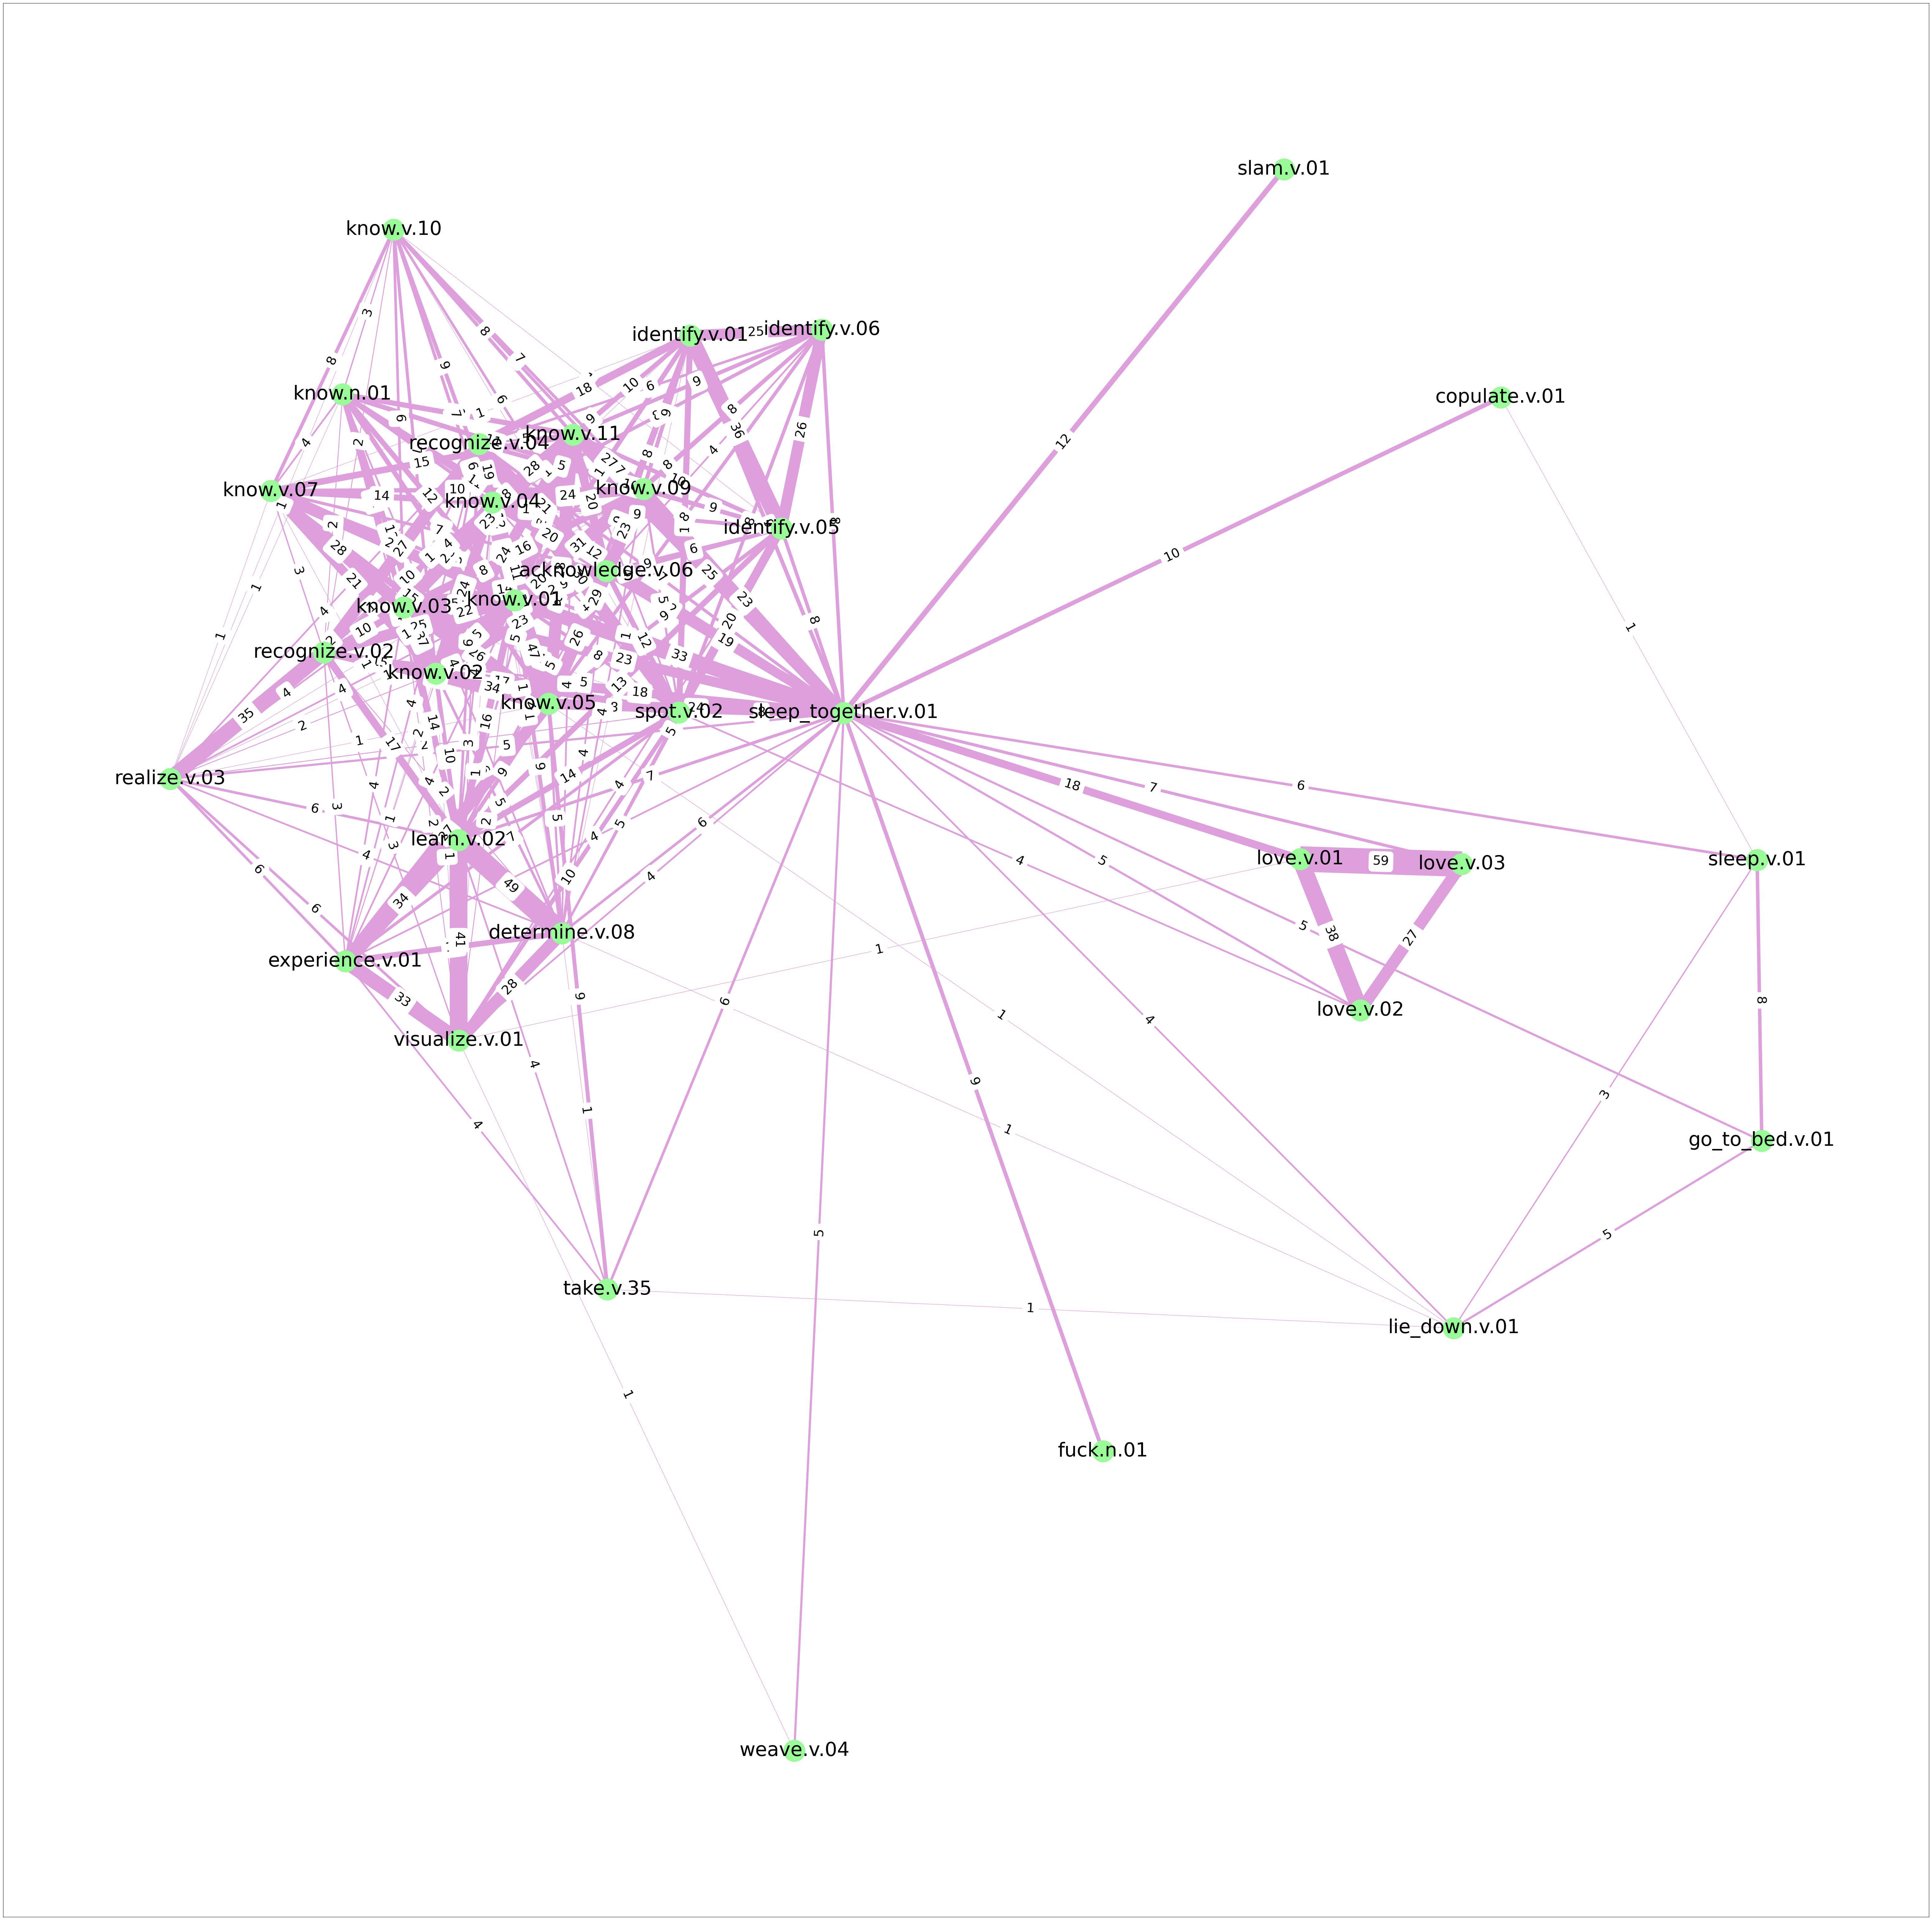

Хочется отметить, что данные в принципе сложно привести к маленькому количеству измерений, потму что связанных синсетов много

**Шаг 4 (max 2 балла).**

Вернитесь к исходному формату данных и снова постройте для вашей связной компоненты граф, но на этот раз постарайтесь сделать так, чтобы в нем было как можно меньше ребер. По такому алгоритму:

- на каждом шаге добавляется ребро с самым большим весом;
- после добавления каждого нового ребра осуществляется проверка, всем ли возможным комбинациям синсетов соответствует связный подграф;
- если всем, то алгоритм останавливается; если не всем, то весь цикл повторяется.

In [18]:
# подгружаем список ребер с весами
with open('graph.json', 'r', encoding='utf-8') as file:
    edges = json.load(file)

In [19]:
edges.sort(key = lambda x: x[2], reverse = True)

In [20]:
edges[:10]

[['love.v.01', 'love.v.03', 59],
 ['know.v.01', 'know.v.03', 51],
 ['learn.v.02', 'determine.v.08', 49],
 ['know.v.01', 'know.v.05', 47],
 ['know.v.01', 'know.v.02', 45],
 ['learn.v.02', 'visualize.v.01', 41],
 ['know.v.01', 'know.v.04', 40],
 ['love.v.01', 'love.v.02', 38],
 ['know.v.02', 'know.v.03', 37],
 ['identify.v.01', 'identify.v.05', 36]]

Далее я проверяю количество компоент связности с помощью алгоритма обхода в глубину. То же самое было бы удобнее сделать с помощью `nx.components.connected_components` и сразу добавлять ребра в граф, а не делать сначала граф в виде списка. 

~но я не вспомнила об этом сразу, так что пусть останется таким сложным способом~

In [21]:
def dfs(G, e):
    global used
    dq = []
    dq.append(e)    
    while dq:
        e = dq[-1]
        if not used[e]:
            dq.extend([neighbor for neighbor in G[e] if not used[neighbor]]) #добавляем белых соседок 
            used[e] = True # красим в черный
        else:
            e = dq.pop() 
    return

In [22]:
# пронумеруем вершины для удобной работы с графами
v_2_synset = dict(enumerate(list(synsets)))
#создадим словарь обратных соответсвий тоже
synset_2_v = {i[1]: i[0] for i in v_2_synset.items()}
# зададим граф списком смежности. Пока нет ни одного ребра
graph = [[] for i in range(len(v_2_synset))] 

In [23]:
edges[0]

['love.v.01', 'love.v.03', 59]

In [24]:
for i in range(len(edges)):
    v1 = synset_2_v.get(edges[i][0])    
    v2 = synset_2_v.get(edges[i][1])
    # добавляем ребро большего веса в список смежности
    graph[v1].append(v2)    
    graph[v2].append(v1)
    
    # проверяем на связность: делаем dfs от одной вершины
    # если прошлись по всем вершинам, у нас 1 компонента связности
    used = [False for i in range(len(graph))]
    dfs(graph, 0)
    if all(used):
        break
        

**Шаг 5 (max 2 балла).**

Визуализируйте новый граф, сравните его с исходным и с картинкой, которую вы получили с помощью MDS.
***
Не будем обозначать на графе веса ребер: они нужны были для того, чтобы отобрать только самые важные связи. Теперь мы верим, что получим настоящую типологически универсальную семантическую карту, по которой можно будет делать предсказания типа "если есть путь X - Y - Z, и в языке X и Z выражаются одним словом, то Y тоже выражается этим словом". Частота таких корреляций уже не так важна. К тому же, без лишней информации на графе его будет легче сравнить с непрерывной семантической картой

In [25]:
edges_list = []
for v in range(len(graph)):
    for e in graph[v]:
        edges_list.append((v_2_synset.get(v), v_2_synset.get(e), 1))

In [27]:
g = nx.Graph()
g.add_nodes_from(list(synsets))
g.add_weighted_edges_from(edges_list)

In [28]:
g.number_of_edges()

163

In [29]:
g.number_of_nodes()

34

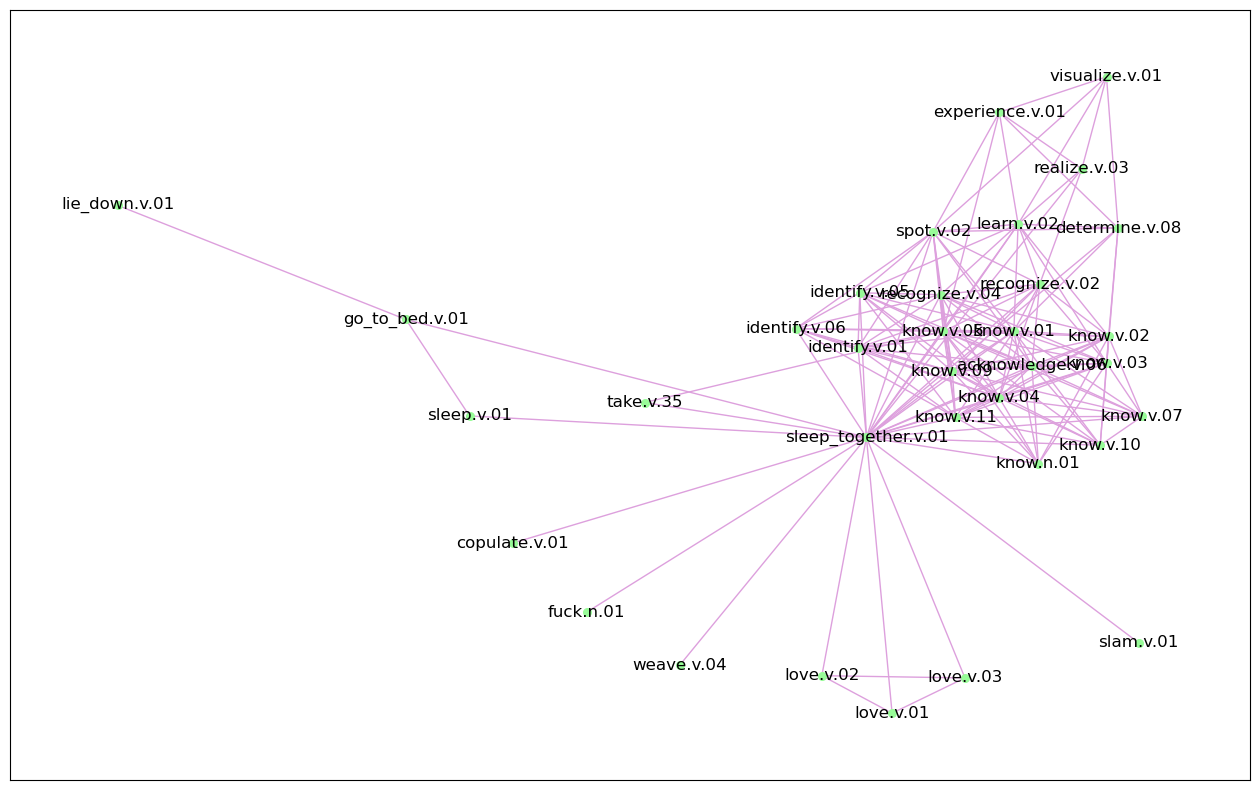

In [30]:
plt.figure(figsize=(16, 10))

pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color='PaleGreen',  node_size=30) 
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos, edge_color='Plum')

plt.show()

Концепт *sleep_together* оказывается соединительным между большим кластером глаголов познания и всеми прочими. Если карта верна, можно делать универсалии вида "если в языке одним образом (для обозначения секса) используются глагол типа *знать* и глагол типа *любить*, то должен быть и глагол со значеним *спать_вместе*" 

Основная закономерность: не может быть, что есть только глаголы познания и сленговые обозначения, не имея глагола со значением *спать_вместе* 

Так же заметно, что *lie_down* не соединен со *sleep_together*. То есть в языке такой глагол не может выражать *sleep_together*, не выражая значение *go_to_bed*.

Но эти выводы могут быть погрешностью карты, так как у нее может быть байес на синсет *sleep_together*, так как, вероятно, это другое названия синсета *love.v.04*, на основе которого и выбирались остальные синсеты.

В остальном граф слишком полный, чтобы делать однозначные выводы. Вообще, минус такой карты в том, что она не отражает диахронический переход, а мы можем его подозревать, потому что синсеты довольно четко делятся на 2 части: арахичные глаголы познания и "грубые" сленговые перифразы.

В перспективе можно проделать ту же работу, но более осмысоенно подойти к выбору синсетов.

**Шаг 6 (бонусный, max 2 балла).**

Можно скачать программу Concept Explorer отсюда или любую другую из существующих имплементаций отсюда, загрузить туда «типологическую» матрицу (пример входного формата данных для этой программы можно посмотреть здесь; обратите внимание, разные реализации FCA могут требовать разных форматов входных данных) и построить по этим данным решетку формальных понятий. Проанализируйте эту решетку: есть ли от нее какой-то толк? Позволяет ли она увидеть какие-то новые закономерности в данных?
***
Возьму случайную небольшую часть матрицы. Для построения решетки использую сайт https://fca-tools-bundle.com/

In [31]:
mini_matrix = matrix.loc['know.v.07':'sleep_together.v.01', ['sleep_together', 'roll_in_the_hay', 'love', 'make_out', 'make_love', 'sleep_with', 'get_laid', 'have_sex']]

In [32]:
# конвертируем в .cxt
with open('mini_matrix.cxt', 'w', encoding='utf-8') as file:
    file.write('B \n\n')    
    file.write(str(mini_matrix.shape[0]))
    file.write('\n')
    file.write(str(mini_matrix.shape[1]))
    file.write('\n')
    file.write('\n')
    for synset in mini_matrix.index:
        file.write(synset)
        file.write('\n')
    for lemma in mini_matrix.columns:
        file.write(lemma)
        file.write('\n')
    for arr in mini_matrix.values:
        line = ''.join([str(i) for i in arr]).replace('0', '.').replace('1', 'X')
        file.write(line)
        file.write('\n')

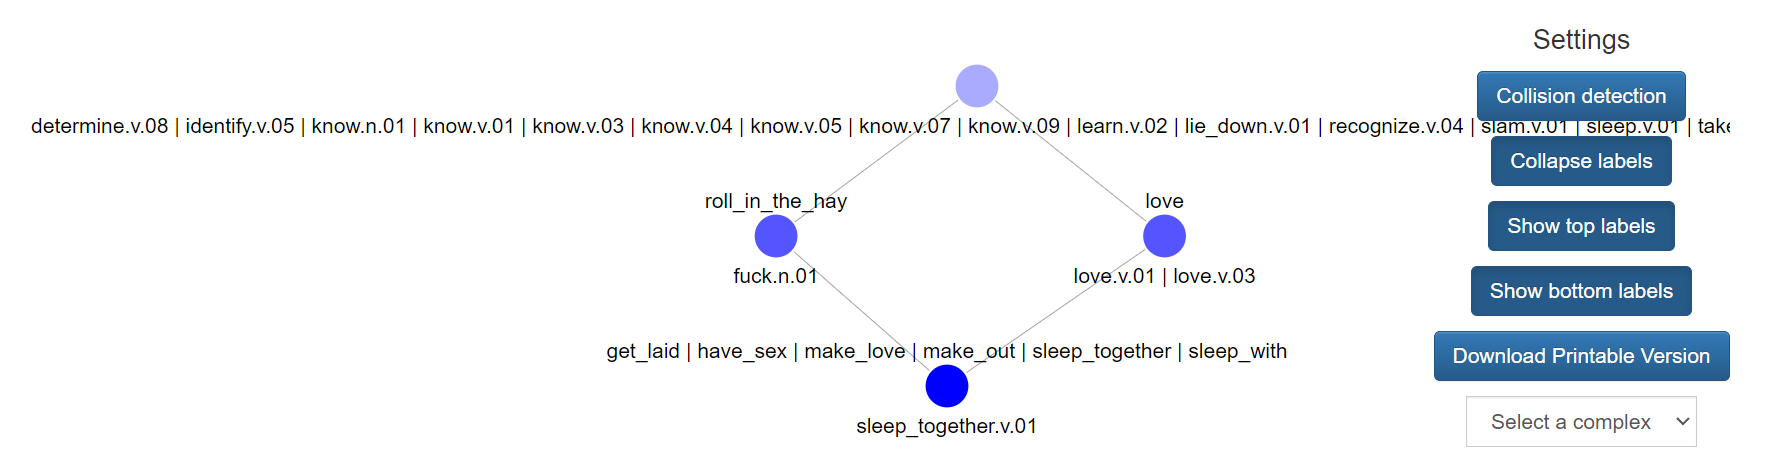

На таком маленьком кусочке видно, что синсеты связанные с познанием расположены наверху, *sleep_together* внизу, а остальное между ними. Это говрит о том, что все сводимо к глаголам познания, это как бы бызовый концепт. А *спать вместе*, наоборот, обладает признаками многих других концептов, то есть это что-то вроде универсального концепта для выражения всех оттенков значения. Действительно, над этим концептом сгруппированны самые нейтральные леммы: *заниматься сексом*, *делать лбовь*, *спать с* и т.д.

Но с большим количеством данных было бы, во-первых, времязатратно построить такую сетку, во-вторых, ее сложно было бы интерпретировать.